# **Hackathon: Shinkansen Travel Experience**

## **Organization**

This project has 3 notebook files.

1. Data_preparation_TheNormals_Hackathon
2. Model_Building_TheNormals_Hackathon
3. Prediction_TheNormals_Hackathon

This notebook is the first notebook where data is prepared and stored in .csv file to be used in the next notebook for model building

## **Problem Statement**

This problem is to determine passengers' experience, whether they are deligighted or not after their travel on the Shinkansen Bullet Train in Japan. This machine learning exercise aims to determine the relative importance of each parameter about their contribution to the passengers' overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named 'Traveldata_train.csv'.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled 'Surveydata_train.csv'.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled 'Overall_Experience', which is the target variable.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. We are provided with test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

## **Solution**

The given problem statement suggests that the problem is a Supervised learning classification problem. We will use various Machine Learning models available in the library for classification and observe which model gives us the best accuracy on the test set and select it as our final model.

### **Loading Libraries**



In [129]:
# libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for GridSearchCV
from sklearn.model_selection import GridSearchCV

# library for KNNImputer
from sklearn.impute import KNNImputer

# ignore Warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading Dataset**



In [130]:
# mount google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
# reading data from .csv files into dataframe
df_traveldata_train = pd.read_csv('/content/drive/MyDrive/DScourse/Hackathon/Traveldata_train_.csv')
df_traveldata_test = pd.read_csv('/content/drive/MyDrive/DScourse/Hackathon/Traveldata_test_.csv')
df_surveydata_train = pd.read_csv('/content/drive/MyDrive/DScourse/Hackathon/Surveydata_train_.csv')
df_surveydata_test = pd.read_csv('/content/drive/MyDrive/DScourse/Hackathon/Surveydata_test_.csv')

### **Data Overview**



#### **Train Data**



**1. Checking head, tail and shape of the two train datasets**

- **Traveldata**

In [132]:
# examining head of traveldata
df_traveldata_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [133]:
# examining tail of traveldata
df_traveldata_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [134]:
# checking the shape of traveldata_train dataset
df_traveldata_train.shape

(94379, 9)

**Observations about Traveldata:**
- Traveldata_train has **94379 rows** and **9 columns**.
- The columns dictionary is as below:
  - `ID`: This is the unique identifier of the passenger
  - `Gender`: Male/Female, the sex of the passenger
  - `Customer_Type`: the type of customer the passenger has been
  - `Type_Travel`: purpose of travel
  - `Travel_Class`: whether the passenger traveled in business class or economy class
  - `Travel_Distance`: The distance the passenger traveled
  - `Departure_Delay_in_Mins`: Departure was delayed by what amount of time in minutes
  - `Arrival_Delay_in_Mins`: Arrival was delayed by what amount of time in minutes

- **Surveydata**

In [135]:
# examining head of surveydata
df_surveydata_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [136]:
# examining tail of surveydata
df_surveydata_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [137]:
# checking the shape of traveldata_train dataset
df_surveydata_train.shape

(94379, 17)

**Observations about Surveydata:**
- Surveydata_Train has **94379 rows** and **17 columns**
- DataFrame dictionary is as below:
  - `ID`: Unique identifier of the passenger
  - `Overall_Experience`: Rating given by the passenger for overall experience of the travel. This is our **target variable**
  - `Seat_Comfort`: text review given by passenger about the seat comfort level
  - `Seat_Class`: Class of the seat in the bullet train
  - `Arrival_Time_Convenient`: Passenger review about the convenience of arrival time
  - `Catering`: Passenger review about catering and food in the train
  - `Platform_Location`: Passenger review regarding the location of the platform
  - `Onboard_Wifi_Service`: Passenger review regarding the their experience with the wifi service available when onboard the train
  - `Onboard_Entertainment`: Passenger review regarding the onboard entertainment system
  - `Online_Support`: Customer experience regarding online support system
  - `Ease_of_Online_Booking`: Customer Experience about booking the tickets online for the travel
  - `Onboard_Service`: Passenger experience regarding the service received onboard the train
  - `Legroom`: Passenger review regarding leg room available for the seat
  - `Baggage_Handling`: Review regarding passenger experience regarding their experience with their baggage handling
  - `CheckIn_Service`: Review about passenger experience at checkin
  - `Cleanliness`: Review regarding the cleanliness of the trains traveled in.
  - `Online_Boarding`: Review regarding the passenger's online boarding experience.


**2. Merging the two datasets into a single trainset**

In [138]:
# merging df_traveldata_train and df_surveydata_train into df_train
df_train = pd.merge(df_traveldata_train, df_surveydata_train, on='ID')
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [139]:
# checking the shape of the new merged dataframe
df_train.shape

(94379, 25)

**Observation:** Merged train dataframe shape is **94379 rows** and **25 columns**

**3. Check datatype**

In [140]:
# checking datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

**Observation:**
- 3 features `int64` datatype
- 3 features `float64` datatype
- 19 features `object` datatype

**4. Change Overall experience as categorical**

Our target is binary and categorical but the data type is int64. Hence, we will change the target variable initally as a categorical variable, and later on change it to numerical before building our models.

In [141]:
# treat Overall_Experience in df_train as categorical
#df_train['Overall_Experience'] = df_train['Overall_Experience'].astype(object)

#### **Test Data**



**1. Checking head, tail and shape of the two test datasets**

- **Traveldata**

In [142]:
# examining head of traveldata
df_traveldata_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [143]:
# examining tail of traveldata
df_traveldata_test.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [144]:
# checking the shape of traveldata_train dataset
df_traveldata_test.shape

(35602, 9)

**Observations about Traveldata:**
- Traveldata_train has **35602 rows** and **9 columns**.
- It has the same columns as in the Traveldata_train dataset

- **Surveydata**

In [145]:
# examining head of surveydata
df_surveydata_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [146]:
# examining tail of surveydata
df_surveydata_test.tail()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


In [147]:
# checking the shape of surveydata_test dataset
df_surveydata_test.shape

(35602, 16)

**Observations about Surveydata:**
- Surveydata_train has **35602 rows** and **16 columns**.
- It has the same columns as in the Surveydata_train dataset

**2. Merging the two datasets into a single test set**

In [148]:
# merging df_traveldata_test and df_surveydata_test into df_test
df_test = pd.merge(df_traveldata_test, df_surveydata_test, on='ID')
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [149]:
# checking the shape of the new merged dataframe
df_test.shape

(35602, 24)

**Observation:** Merged test dataframe shape is **35602 rows** and **24 columns** The target feature `Overall_Experience` is missing in the test dataset.

**3. Check datatype**

In [150]:
# checking datatypes
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

**Observation:**
- 2 features `int64` datatype
- 3 features `float64` datatype
- 19 features `object` datatype

Our target features `Overall_experience` is missing from the test dataset. hence, tis test dataset can be used only for prediction and not for model training purposes.

### **Exploratory Data Analysis**



#### **Train Data**



**1. Statistical summary of numeric and categorical features**

- **Numerical Features**

In [151]:
# seperating numerical columns from categorical columns
df_train_num = df_train.select_dtypes(['int64', 'float64'])
df_train_cat = df_train.select_dtypes(['object'])

# dropping ID from numerical because it is ordinal and does not add value to our analysis
df_train_num.drop(['ID', 'Overall_Experience'], axis = 1, inplace=True)

In [152]:
# summary statistics for numeric datatypes
df_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


**Observation:** We can observe that the max value for `Departure_Delay_in_Mins` is 1592 mins and max value for `Arrival_Delay_in_Mins` is 1584 mins. These values seem very high and need further investigation.

- **Categorical Features**

In [153]:
# summary statistics for numeric datatypes
df_train_cat.describe().T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835


**2. Unique records for categorical features categorical features**

In [154]:
# displaying number of unique records for each feature with their valuecounts
for col in df_train_cat.columns:
    print(col,":")
    print(df_train[col].value_counts())
    print("**"*25)

print(col,":")
print(df_train['Overall_Experience'].value_counts())

Gender :
Female    47815
Male      46487
Name: Gender, dtype: int64
**************************************************
Customer_Type :
Loyal Customer       69823
Disloyal Customer    15605
Name: Customer_Type, dtype: int64
**************************************************
Type_Travel :
Business Travel    58617
Personal Travel    26536
Name: Type_Travel, dtype: int64
**************************************************
Travel_Class :
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64
**************************************************
Seat_Comfort :
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
**************************************************
Seat_Class :
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
**************************************************
Arrival_Time_Convenient :
Good                 195

**3. Percentage of missing data for each feature**

In [155]:
# display columns with their missing data in percentage
np.round(df_train.isnull().sum() * 100 / df_train.shape[0], 2)

ID                         0.00
Gender                     0.08
Customer_Type              9.48
Age                        0.03
Type_Travel                9.78
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.06
Arrival_Delay_in_Mins      0.38
Overall_Experience         0.00
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.46
Catering                   9.26
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.10
Ease_of_Online_Booking     0.08
Onboard_Service            8.05
Legroom                    0.10
Baggage_Handling           0.15
CheckIn_Service            0.08
Cleanliness                0.01
Online_Boarding            0.01
dtype: float64

**Observations:**
- 5 features have **NO** missing data
- 20 features have missing data but each column has less than 10% missing data

**4. Check for duplicate records**

In [156]:
# check for duplicate records in df_train dataframe
df_train.duplicated().sum()

0

**Observations:** There are 0 records that are duplicates.

#### **Test Data**



**1. Statistical summary of numeric and categorical features**

In [157]:
# seperating numerical columns from categorical columns
df_test_num = df_test.select_dtypes(['int64', 'float64'])
df_test_cat = df_test.select_dtypes(['object'])

# dropping ID from numerical columns because it is ordinal and does not add much value for our analysis
df_test_num.drop('ID', axis = 1, inplace = True)

In [158]:
# summary statistics for numeric datatypes
df_test_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,35591.0,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Travel_Distance,35602.0,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0


**Observation:** We can observe that the max value for `Departure_Delay_in_Mins` is 978 mins and max value for `Arrival_Delay_in_Mins` is 970 mins. These values seem very high and need further investigation.

In [159]:
# summary statistics for numeric datatypes
df_test_cat.describe().T

,count,unique,top,freq
Gender,35572,2,Female,18069
Customer_Type,32219,2,Loyal Customer,26349
Type_Travel,32154,2,Business Travel,22313
Travel_Class,35602,2,Eco,18473
Seat_Comfort,35580,6,Acceptable,8003
Seat_Class,35602,2,Ordinary,17860
Arrival_Time_Convenient,32277,6,Good,7361
Catering,32245,6,Acceptable,7133
Platform_Location,35590,5,Manageable,9364
Onboard_Wifi_Service,35590,6,Good,8743


**2. Unique records for categorical features categorical features**

In [160]:
# displaying number of unique records for each feature with their valuecounts
for col in df_test_cat.columns:
    print(col,":")
    print(df_test[col].value_counts())
    print("**"*25)

Gender :
Female    18069
Male      17503
Name: Gender, dtype: int64
**************************************************
Customer_Type :
Loyal Customer       26349
Disloyal Customer     5870
Name: Customer_Type, dtype: int64
**************************************************
Type_Travel :
Business Travel    22313
Personal Travel     9841
Name: Type_Travel, dtype: int64
**************************************************
Travel_Class :
Eco         18473
Business    17129
Name: Travel_Class, dtype: int64
**************************************************
Seat_Comfort :
Acceptable           8003
Needs Improvement    7831
Good                 7808
Poor                 5755
Excellent            4854
Extremely Poor       1329
Name: Seat_Comfort, dtype: int64
**************************************************
Seat_Class :
Ordinary     17860
Green Car    17742
Name: Seat_Class, dtype: int64
**************************************************
Arrival_Time_Convenient :
Good                 7361
Exce

**3. Percentage of missing data for each feature**

In [161]:
# display columns with their missing data in percentage
np.round(df_test.isnull().sum() * 100 / df_test.shape[0], 2)

ID                         0.00
Gender                     0.08
Customer_Type              9.50
Age                        0.03
Type_Travel                9.68
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.08
Arrival_Delay_in_Mins      0.35
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.34
Catering                   9.43
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.07
Ease_of_Online_Booking     0.05
Onboard_Service            8.07
Legroom                    0.07
Baggage_Handling           0.11
CheckIn_Service            0.06
Cleanliness                0.01
Online_Boarding            0.01
dtype: float64

**Observations:**
- 4 features have **NO** missing data
- 19 features have missing data but each column has less than 10% missing data

**4. Check for duplicate records**

In [162]:
# check for duplicate records in df_test dataframe
df_test.duplicated().sum()

0

### **Univariate Analysis for both train and test sets**



#### **Numerical Features**

<Figure size 1000x1000 with 0 Axes>

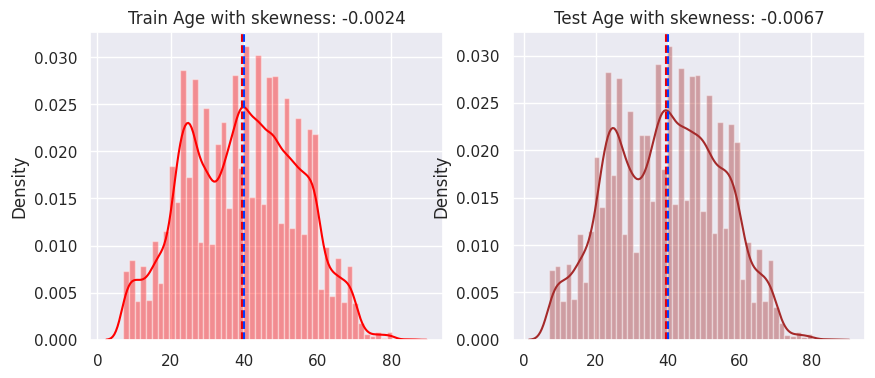

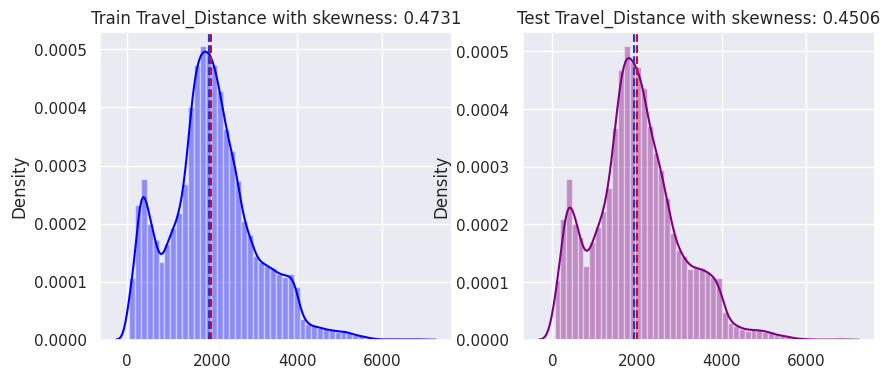

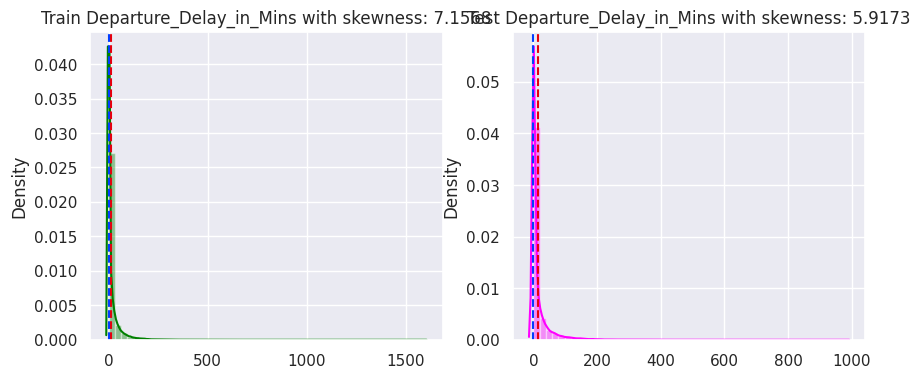

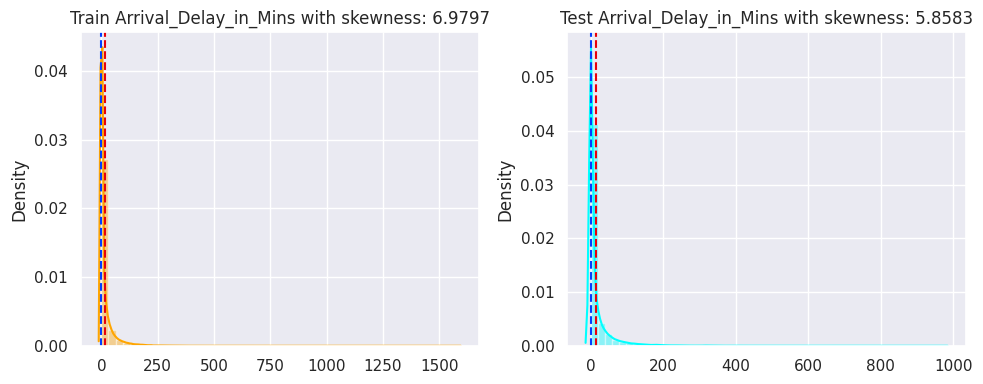

In [44]:
# declare list of colors
colors = ['red', 'blue', 'green', 'orange', 'brown', 'purple', 'magenta', 'cyan', 'yellow', 'violet', 'teal', 'tan',
          'red', 'blue', 'green', 'orange', 'brown', 'purple', 'magenta', 'cyan', 'yellow', 'violet', 'teal', 'tan']

# setting plot themes
sns.set_theme(style="darkgrid", palette="bright")

# display histogram for numerical train data
fig = plt.figure(figsize=(10, 10))

for i, col in enumerate(df_test_num):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.distplot(x=df_train[col], ax=ax[0], kde = True, color = colors[i])
    skewness1 = "Train " + col + " with skewness: " + str(np.round(df_train[col].skew(),4))
    ax[0].title.set_text(skewness1)
    ax[0].axvline(df_train[col].mean(), color='r', linestyle='--') #red line showing mean
    ax[0].axvline(df_train[col].median(), color='b', linestyle='--') #blue line showing median

    sns.distplot(x=df_test[col], ax=ax[1], kde = True, color = colors[4+i])
    skewness2 = "Test " + col + " with skewness: " + str(np.round(df_test[col].skew(),4))
    ax[1].title.set_text(skewness2)
    ax[1].axvline(df_test[col].mean(), color='r', linestyle='--') #red line showing mean
    ax[1].axvline(df_test[col].median(), color='b', linestyle='--') #blue line showing median

plt.tight_layout()

<Figure size 1000x800 with 0 Axes>

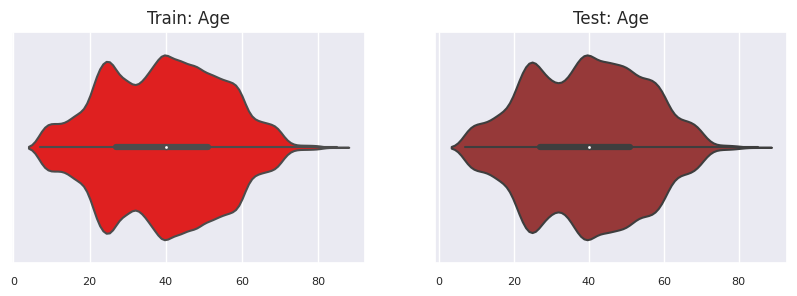

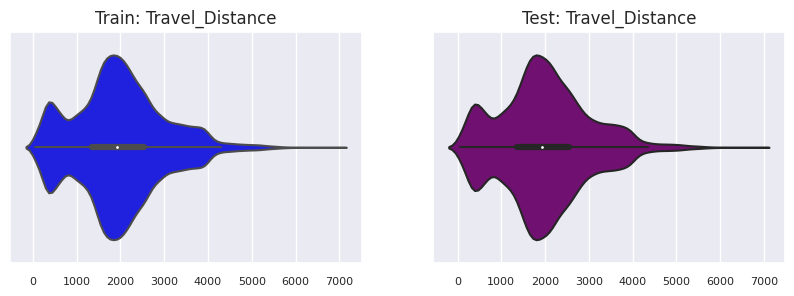

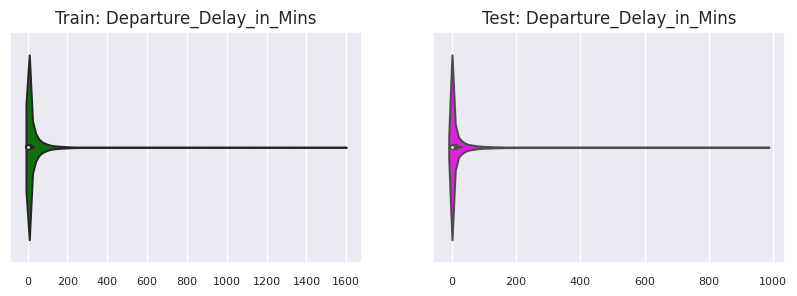

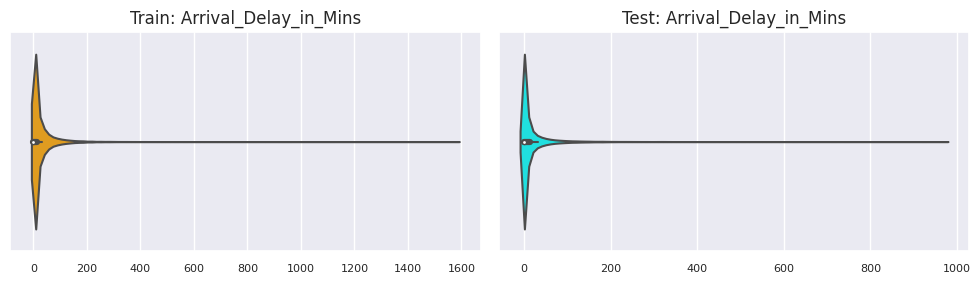

In [45]:
# display violinboxplot for numerical train data
fig = plt.figure(figsize=(10, 8))
for i, col in enumerate(df_test_num):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.violinplot(x=df_train[col], ax=ax[0], kde = True, color = colors[i])
    ax[0].set_xlabel(col, fontsize = 10)
    ax[0].tick_params(axis='both', labelsize=8)
    ax[0].title.set_text("Train: " + col)
    ax[0].set_xlabel('')

    sns.violinplot(x=df_test[col], ax=ax[1], kde = True, color = colors[i+4])
    ax[1].set_xlabel(col, fontsize = 10)
    ax[1].tick_params(axis='both', labelsize=8)
    ax[1].title.set_text("Test: " + col)
    ax[1].set_xlabel('')

plt.tight_layout()

**Observations:**
- **`Age`**: Multimodal distribution with mean and median very close to each other meaning data not very severely skewed
- **`Travel_Distance`**: Multimodal distribution with mean and median very close to each other meaning data not very severely skewed
- **`Departure_Delay_in_Mins`**: Very high concentration of data near 0 which means there are not many departure delays. But range is very high, hence data is highly positively skewed.
- **`Arrival_Delay_in_Mins`**: Very high concentration of data near 0 which means there are not many arrival delays. But range is very high, hence data is highly positively skewed.

#### **Categorical Features**

In [ ]:
for i, col in enumerate(df_test_cat):
    ax = fig.add_subplot(5, 4, i + 1)
    sns.countplot(data = df_train, x = col, palette = 'bright')
    # Annotate bars with frequency of occurences
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_train[col]))  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot
        ax.annotate(percentage, (x, y), size=8, ha='center')  # Annotate the percentage with center alignment
    ax.set_xlabel(col, fontsize = 10)
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
plt.tight_layout()

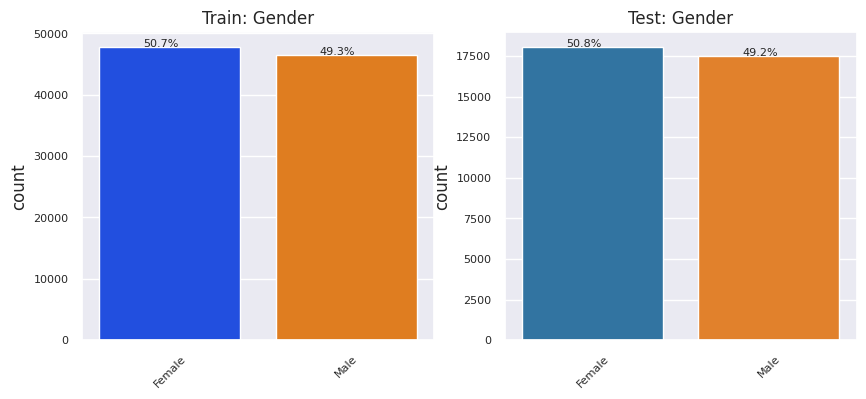

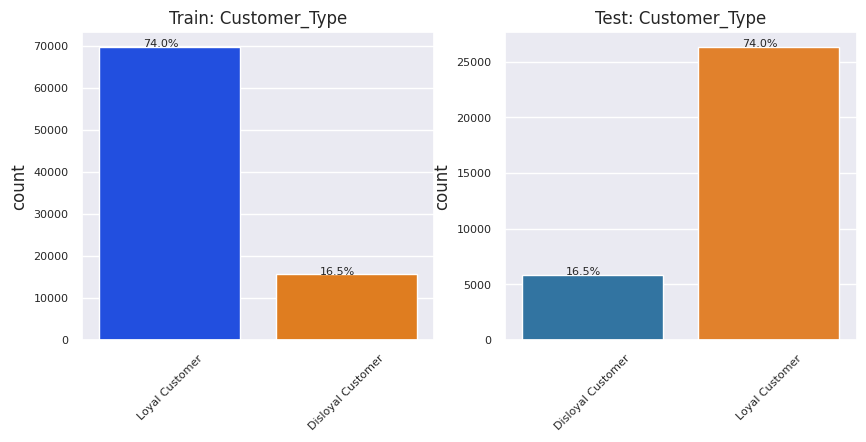

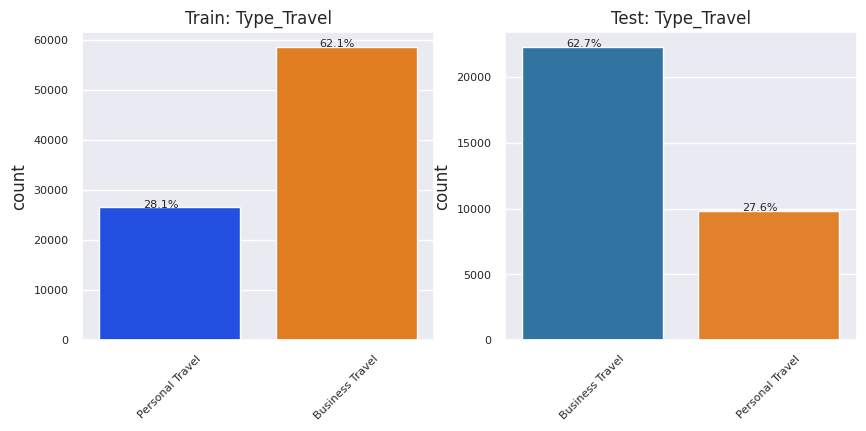

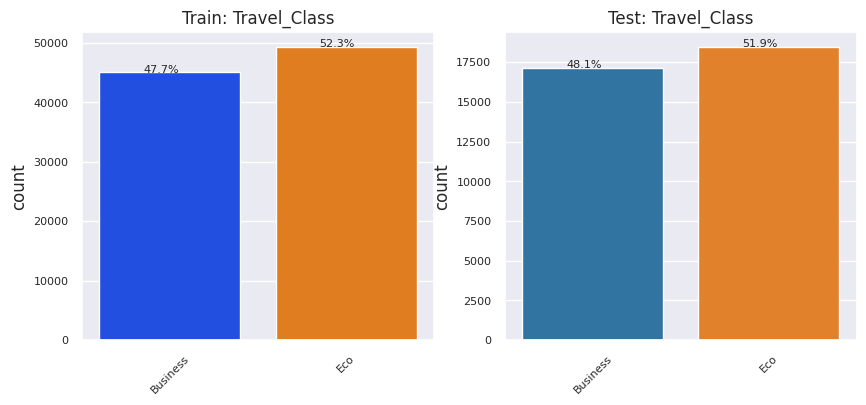

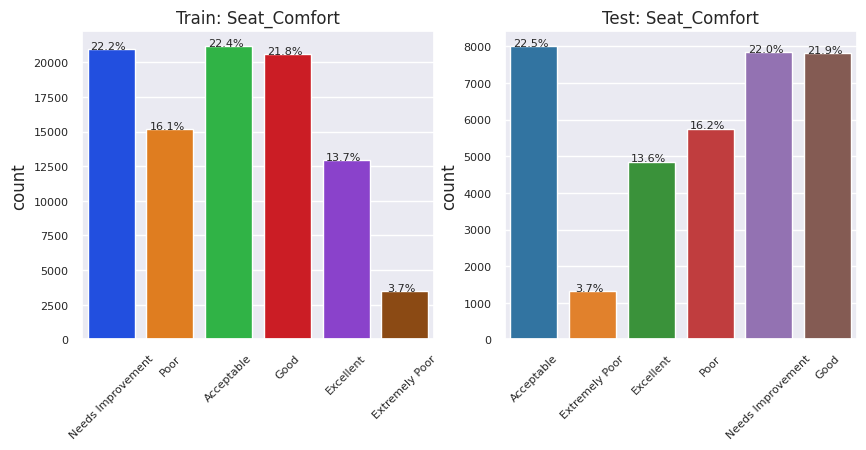

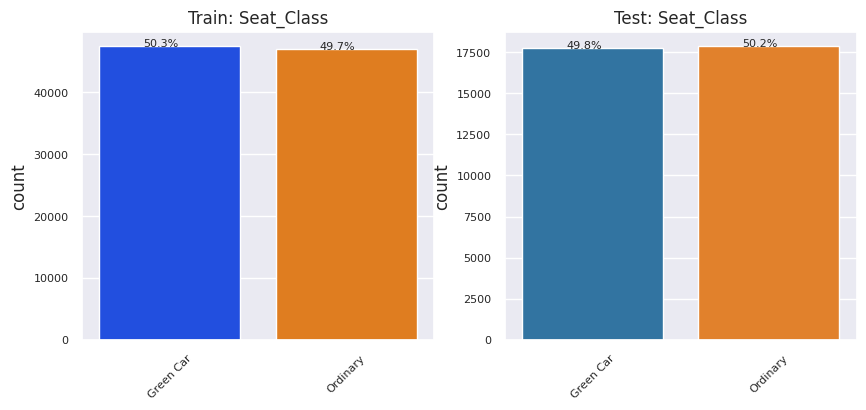

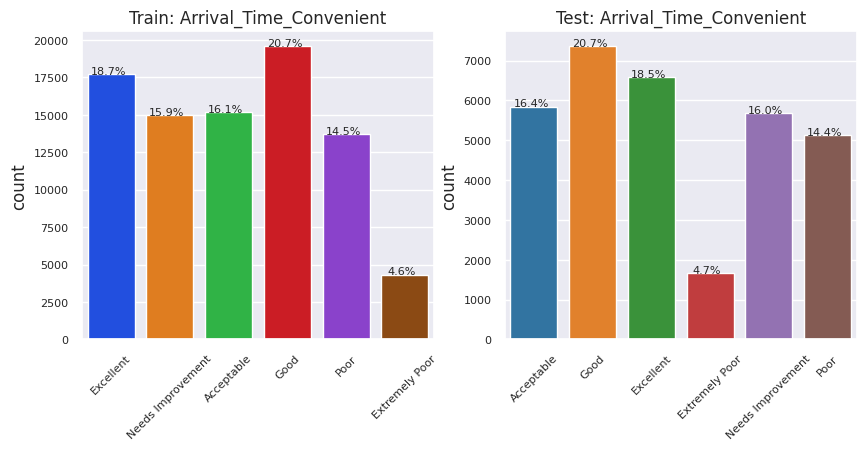

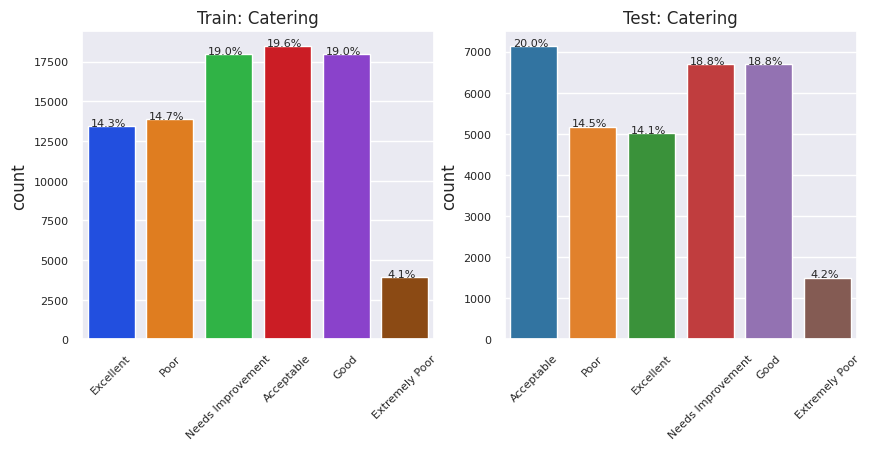

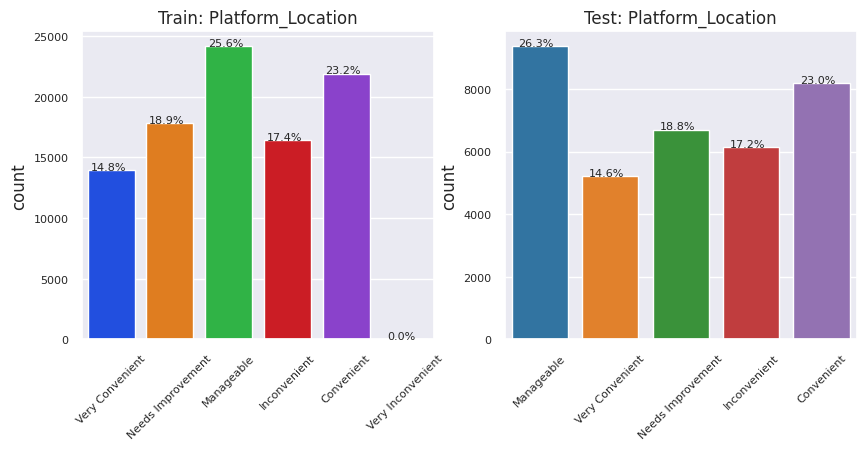

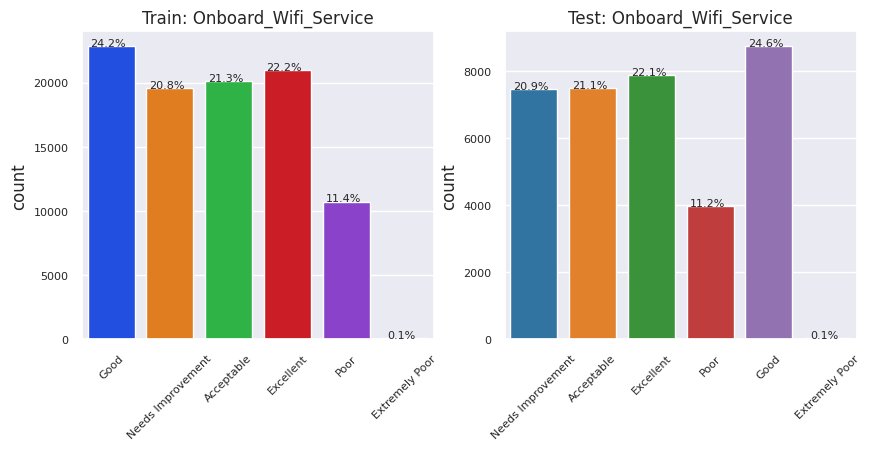

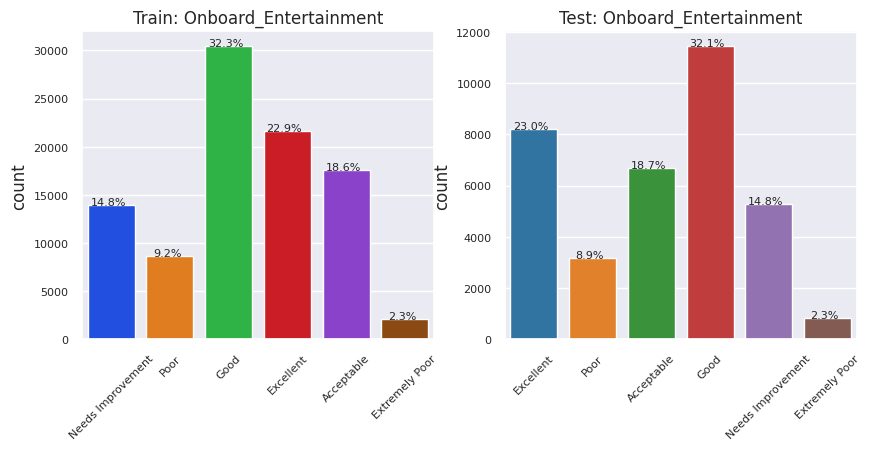

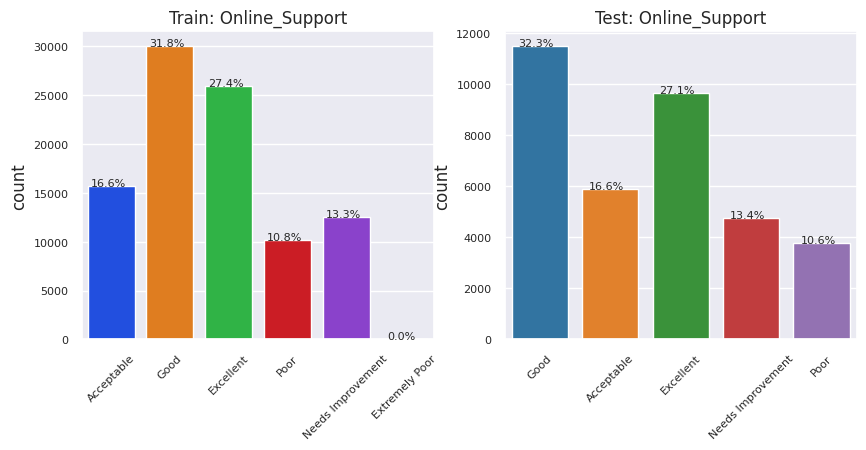

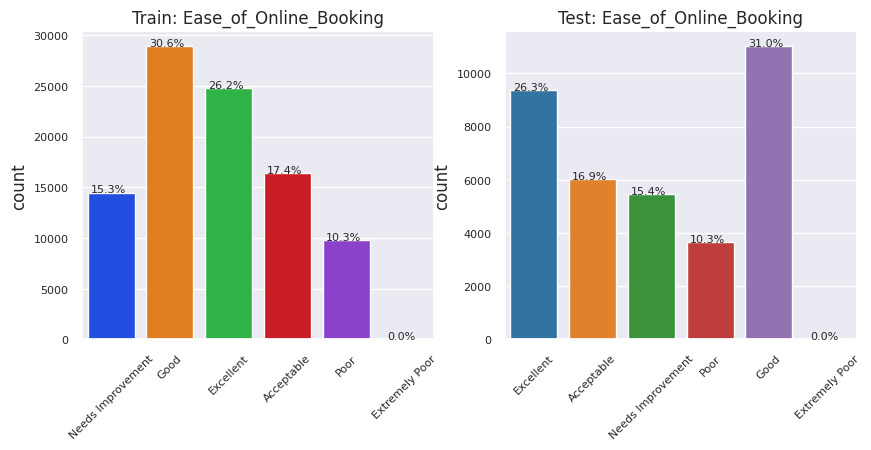

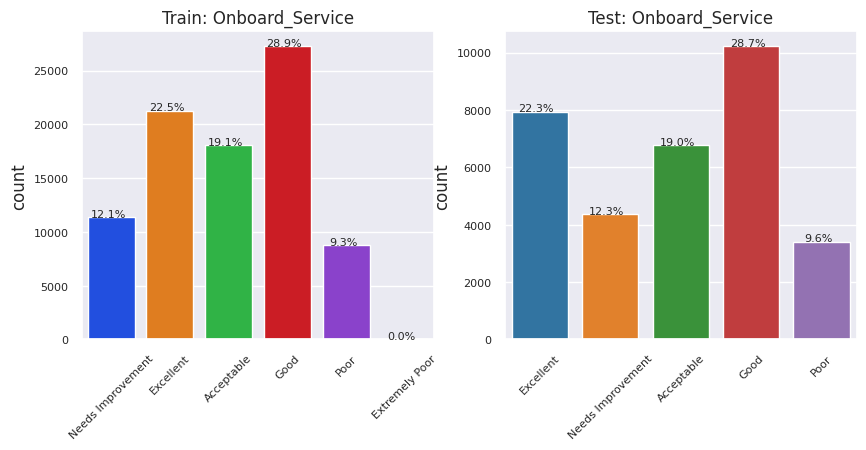

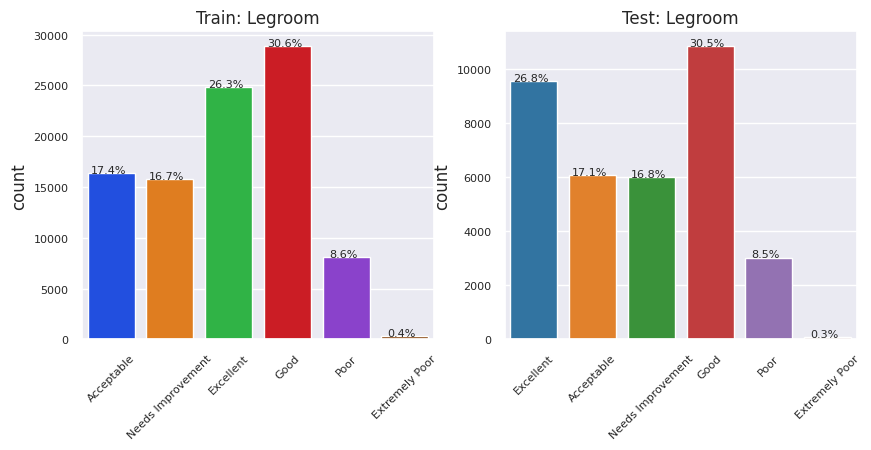

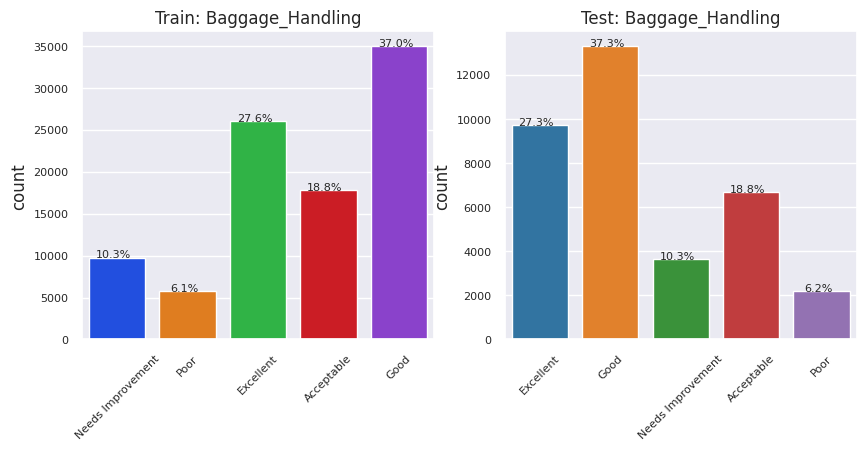

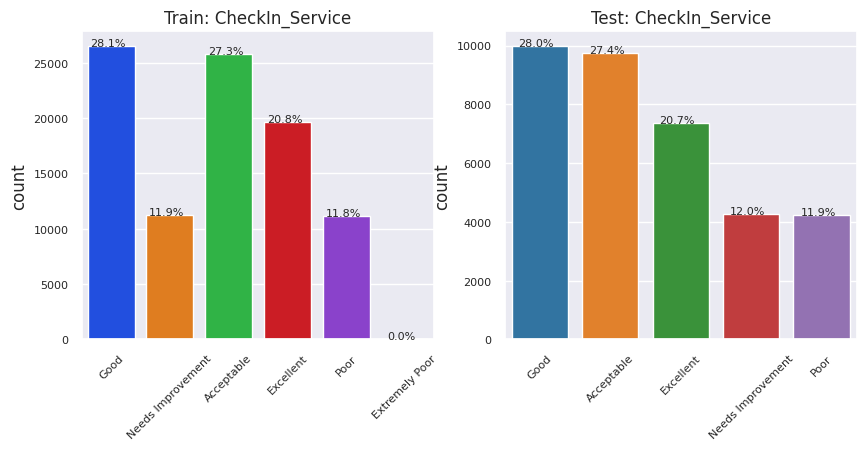

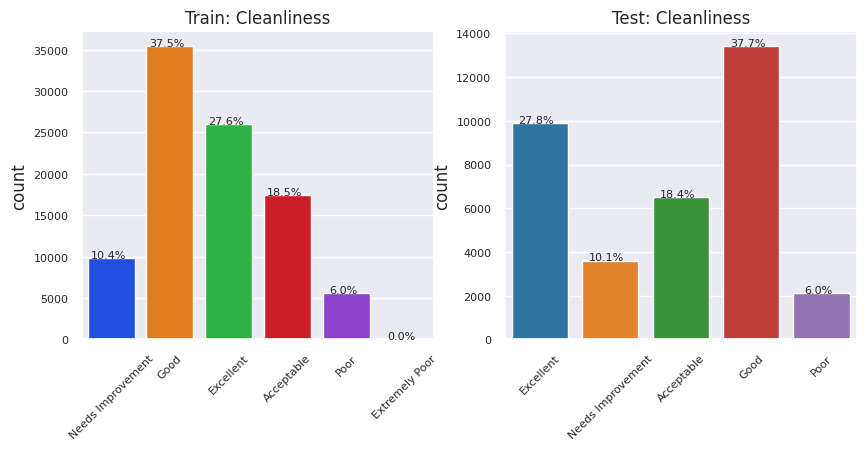

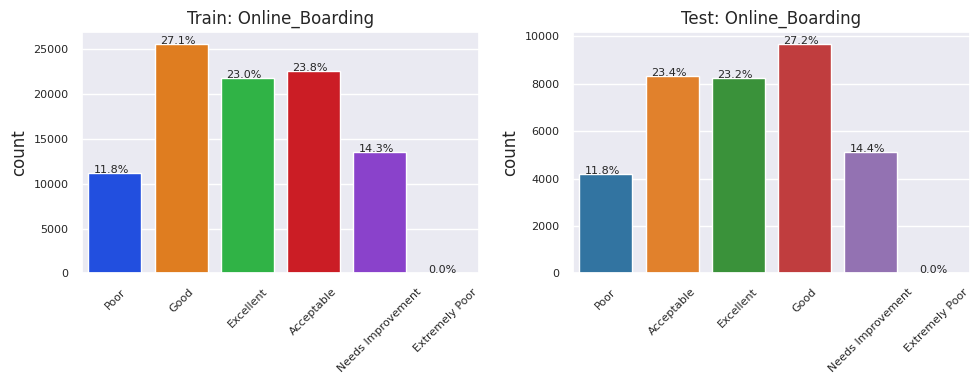

In [54]:
# creating countplot for all categorcial features

for i, col in enumerate(df_test_cat):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.countplot(data = df_train, x = col, ax = ax[0], palette = 'bright')
    # Annotate bars with frequency of occurences
    for p in ax[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_train[col]))  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot
        ax[0].annotate(percentage, (x, y), size=8, ha='center')  # Annotate the percentage with center alignment
    ax[0].tick_params(axis='both', labelsize=8)
    ax[0].title.set_text("Train: " + col)
    ax[0].set_xlabel('')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='center')

    sns.countplot(data = df_test, x = col, ax = ax[1], palette = 'tab10')
    # Annotate bars with frequency of occurences
    for p in ax[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_test[col]))  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot
        ax[1].annotate(percentage, (x, y), size=8, ha='center')  # Annotate the percentage with center alignment
    ax[1].tick_params(axis='both', labelsize=8)
    ax[1].title.set_text("Test: " + col)
    ax[1].set_xlabel('')
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='center')

plt.tight_layout()

Target Variable: `Overall_Experience` in train set

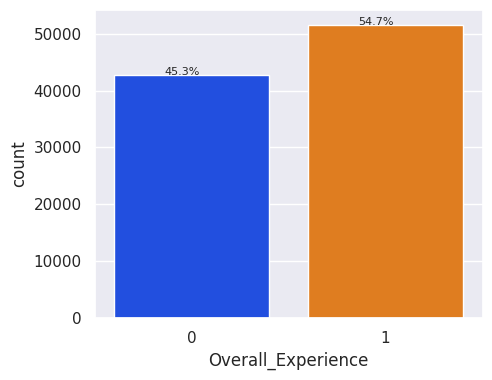

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.countplot(data = df_train, x = 'Overall_Experience', palette = 'bright')
# Annotate bars with frequency of occurences
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_train['Overall_Experience']))  # Percentage of each class of the category
    x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
    y = p.get_y() + p.get_height()  # Height of the plot
    ax.annotate(percentage, (x, y), size=8, ha='center')  # Annotate the percentage with center alignment


### **Bivariate/Multivariate Analysis**



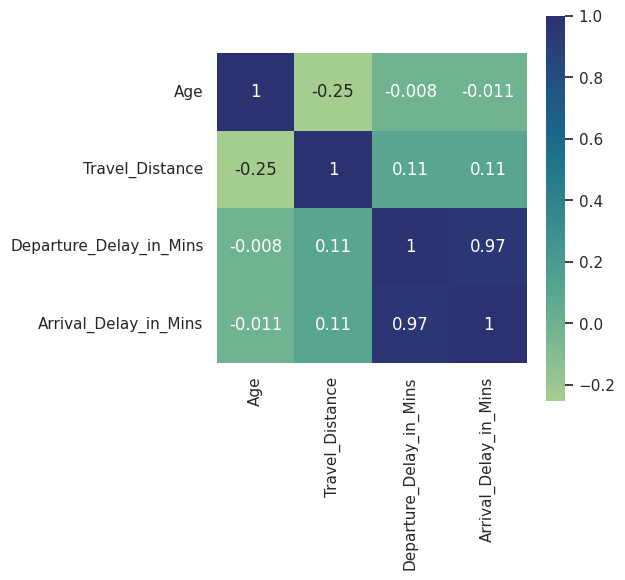

In [163]:
# declaring the font family to be used in the plots
font = {'family' : 'normal',
        'weight' : 'normal',
        'size' : 6}
plt.rc('font', **font)

# obtaining heatmap for the numberical features to observe correalation between the variables
plt.figure(figsize = (5,5))
sns.set_theme(style="white")
sns.heatmap(data = df_train_num.corr(), annot=True, square = True, cmap = 'crest')
plt.show()

**Observations:**
- There is high positive correlation between `Arrival_Delay_in_Mins` and `Departure_Delay_in_Mins`. This means that if the departure time is delayed, then the arrival time of the bullet train will also be delayed. This is understandable and often observed in all cases.
- There is very weak correlation between all other features.

<Figure size 500x500 with 0 Axes>

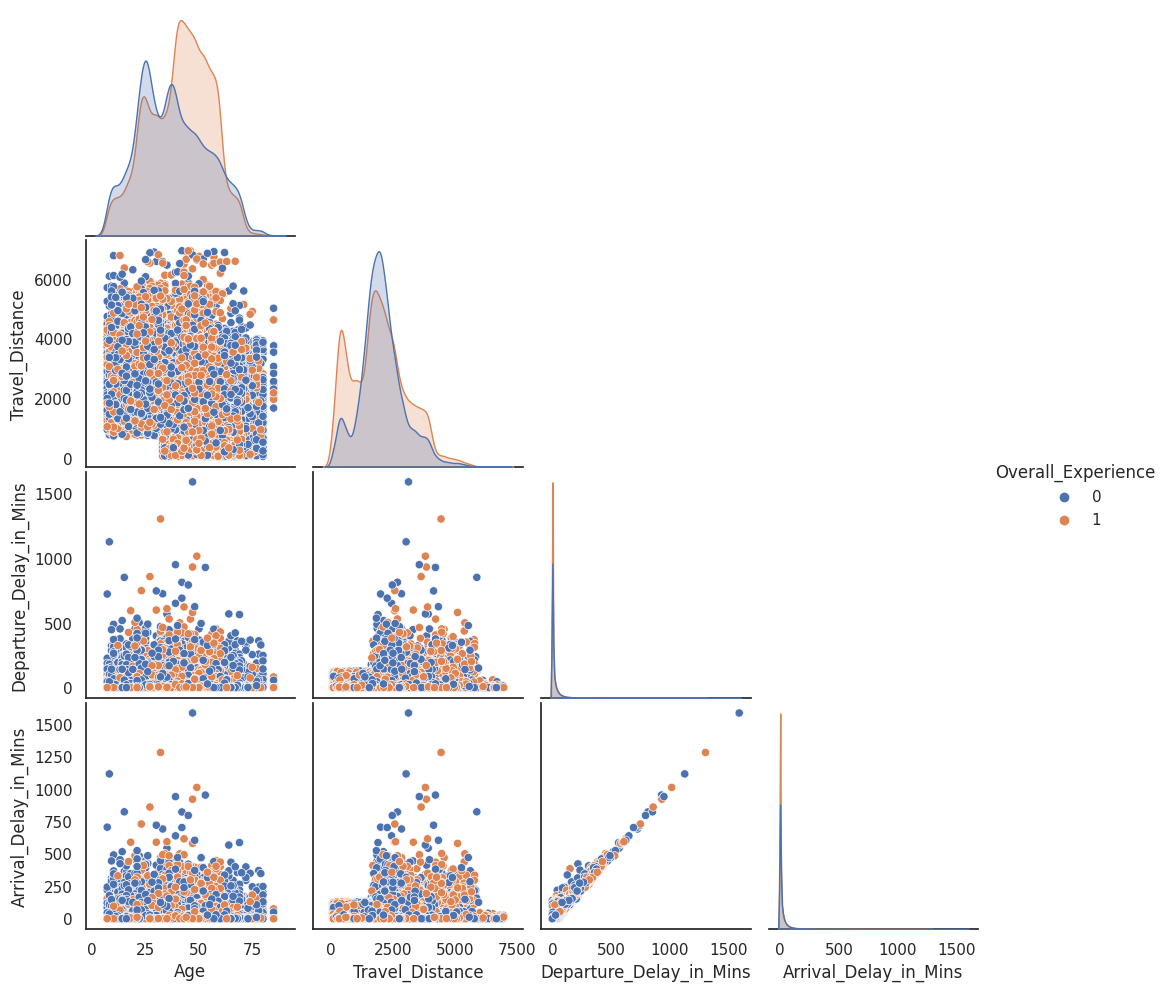

In [ ]:
# making a copy of the numerical dataframe without ID
df_train_wo_ID = df_train.copy()
df_train_wo_ID.drop('ID', axis = 1, inplace= True)

# setting font for the pairplot
font = {'size' : 6}
plt.rc('font', **font)

# paiplot to observe any possible pattern with target variable
plt.figure(figsize = (5,5))
sns.pairplot(data = df_train_wo_ID, hue = 'Overall_Experience', corner = True, kind = 'scatter')
plt.show()

**Observation:**
- We can observe that there is a positive linear relation between `Arrival_Delay_in_Mins` and `Departure_Delay_in_Mins`. As Departure Delay increases, Arrival Delay also increases.
- We observe a higher numbers of 0 for `Overall_Experience` among younger age, compared to older age passengers.
- We observe mostly 0 `Overall_Experience` in higher Arrival Delay and Departure Delay times.

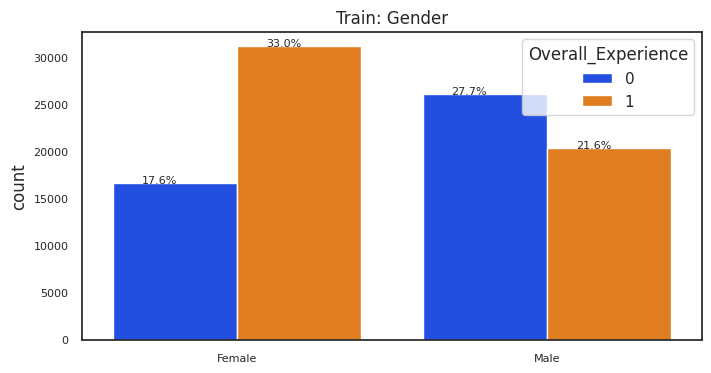

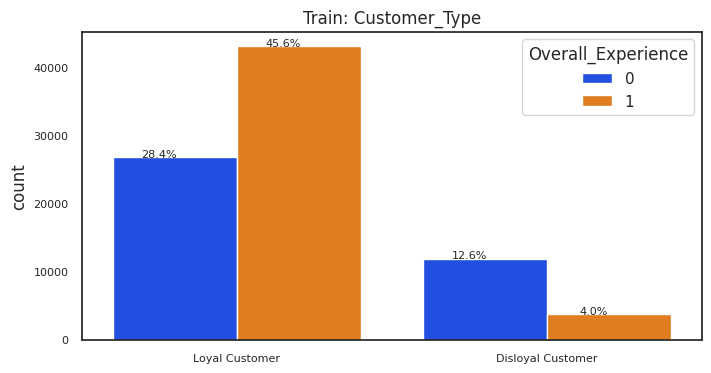

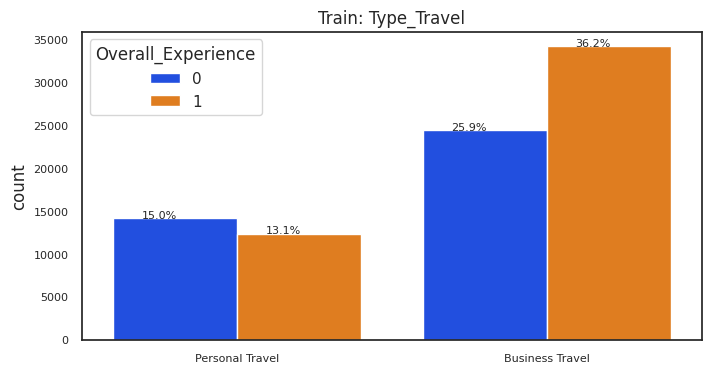

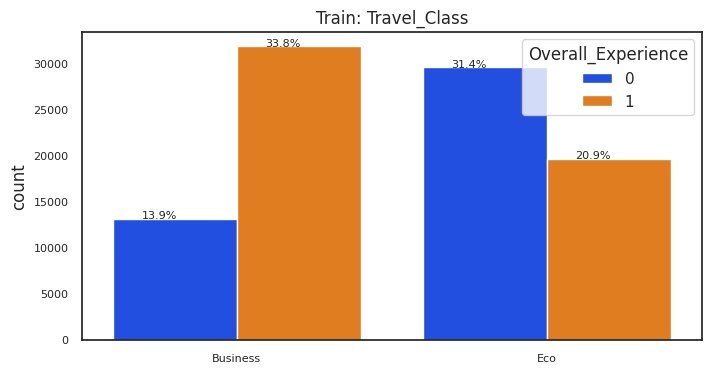

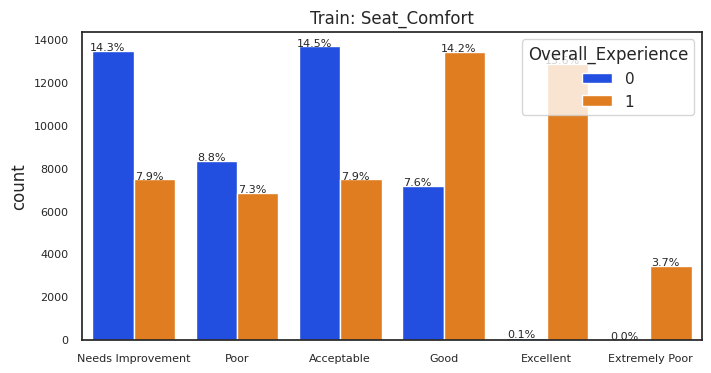

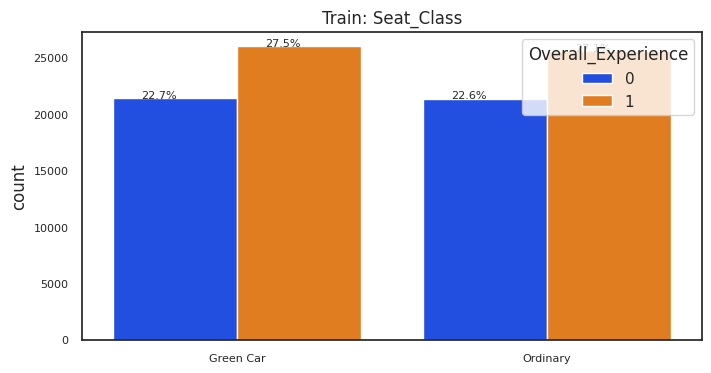

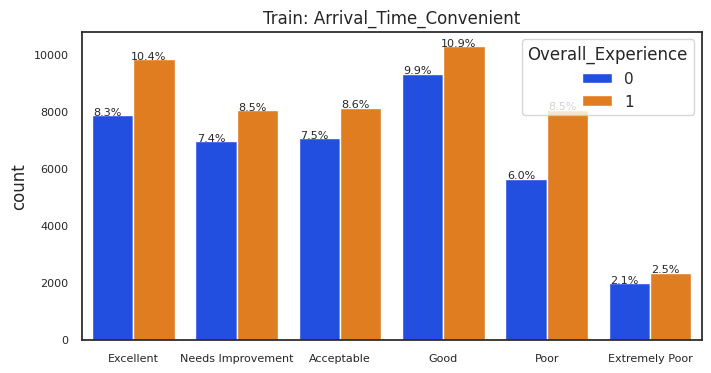

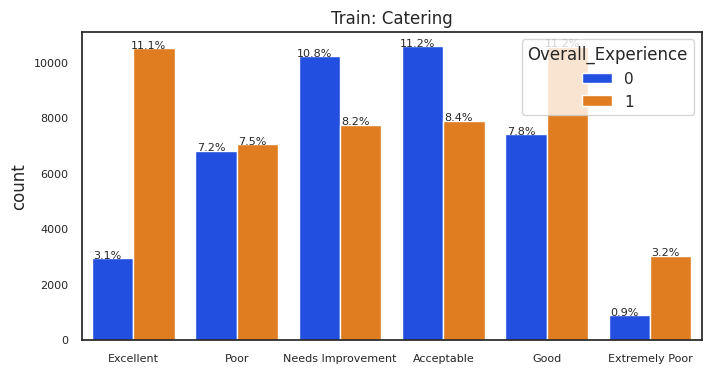

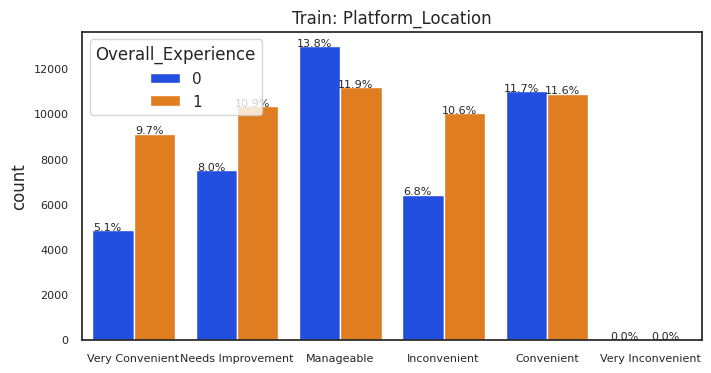

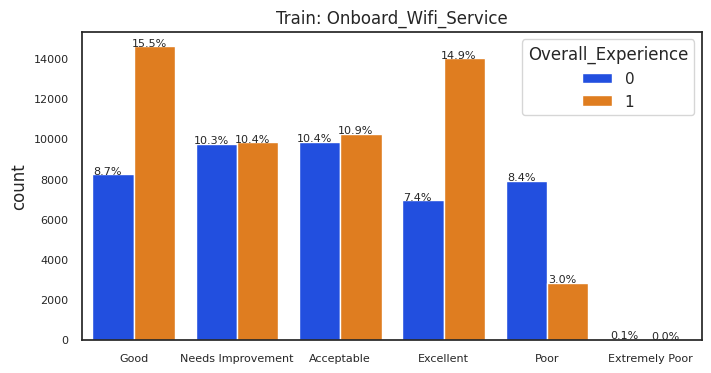

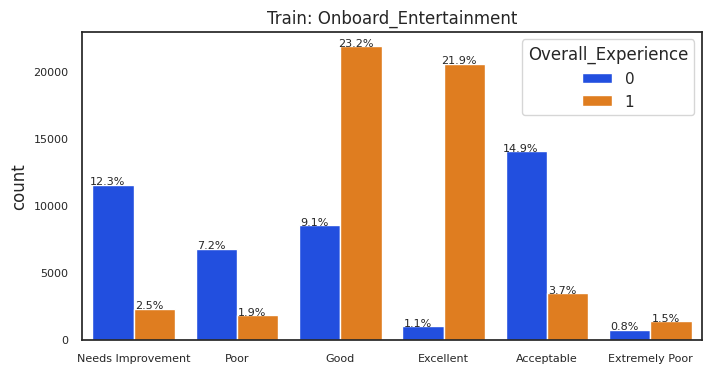

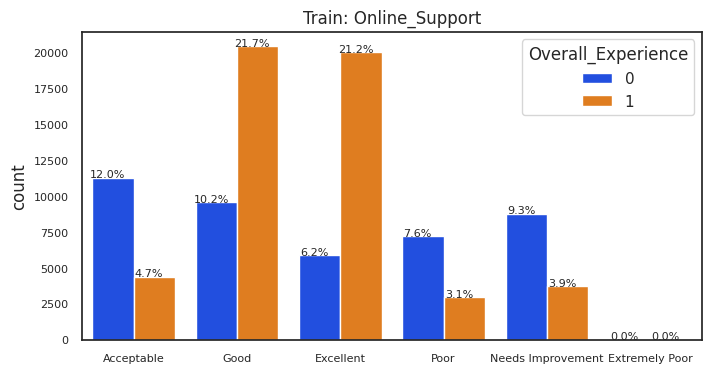

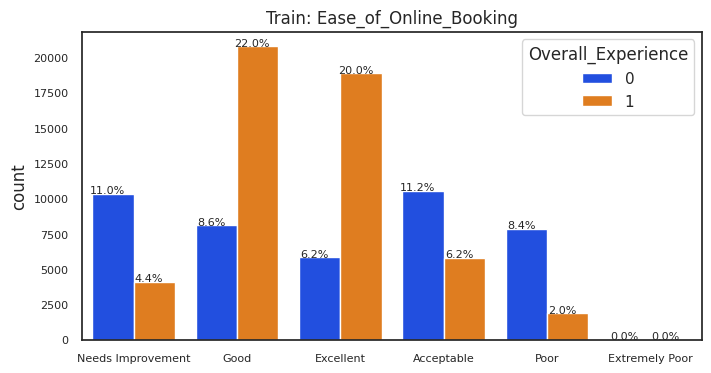

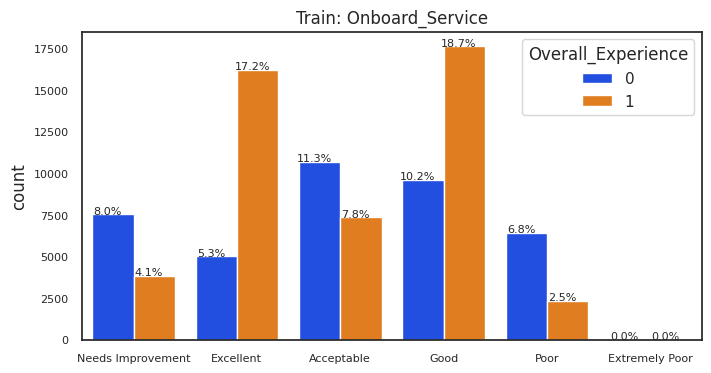

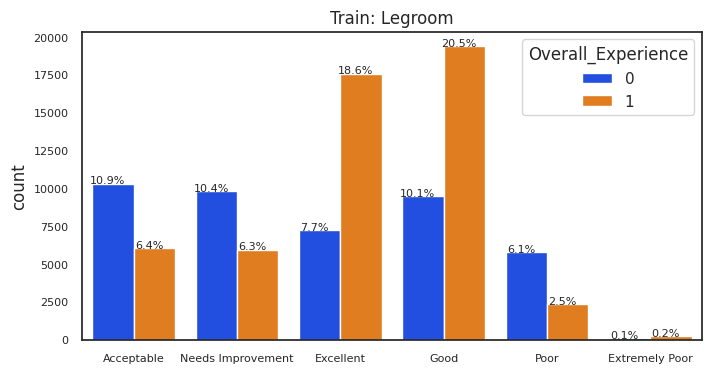

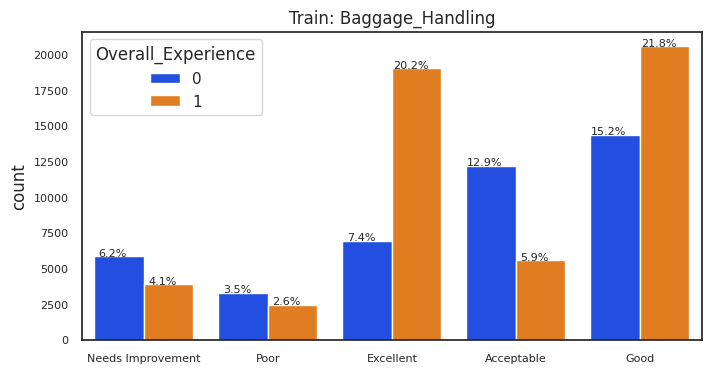

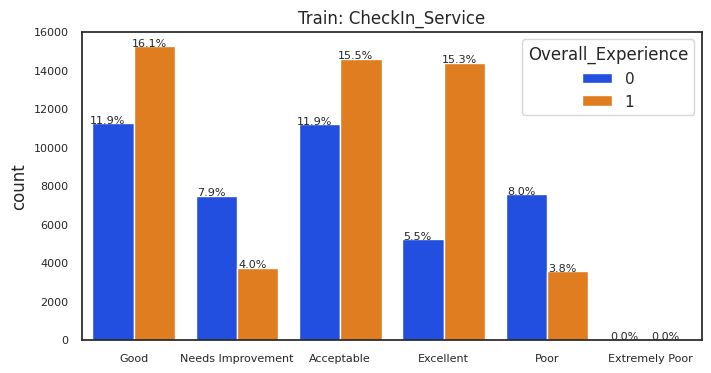

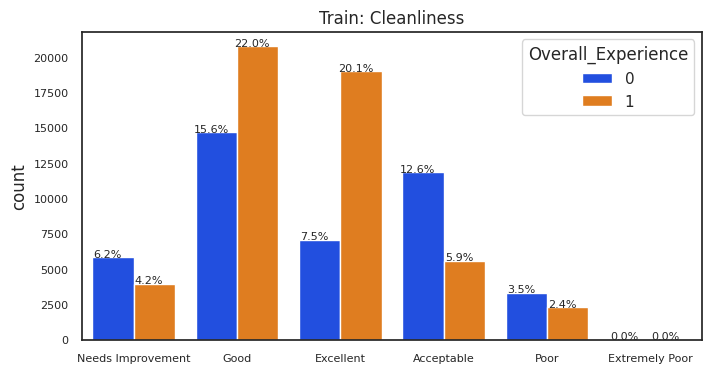

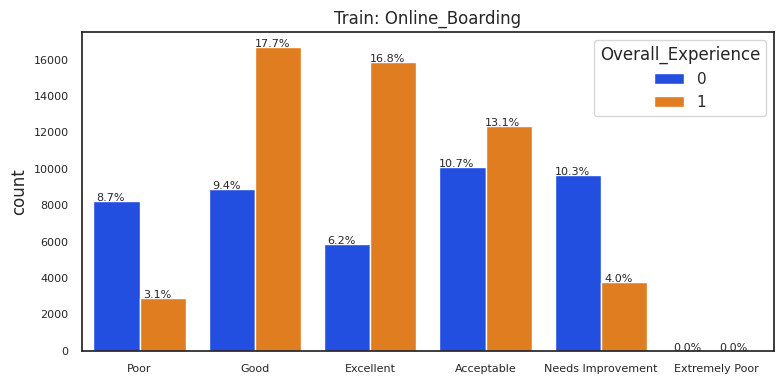

In [165]:
for i, col in enumerate(df_train_cat):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    sns.countplot(data = df_train, x = col, ax = ax, palette = 'bright', hue = 'Overall_Experience')
    # Annotate bars with frequency of occurences
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_train[col]))  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot
        ax.annotate(percentage, (x, y), size=8, ha='center')  # Annotate the percentage with center alignment
    ax.tick_params(axis='both', labelsize=8)
    ax.title.set_text("Train: " + col)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.tight_layout()

Now we will try to observe if we can observe any patterns in the Categorical features affecting our target variable.

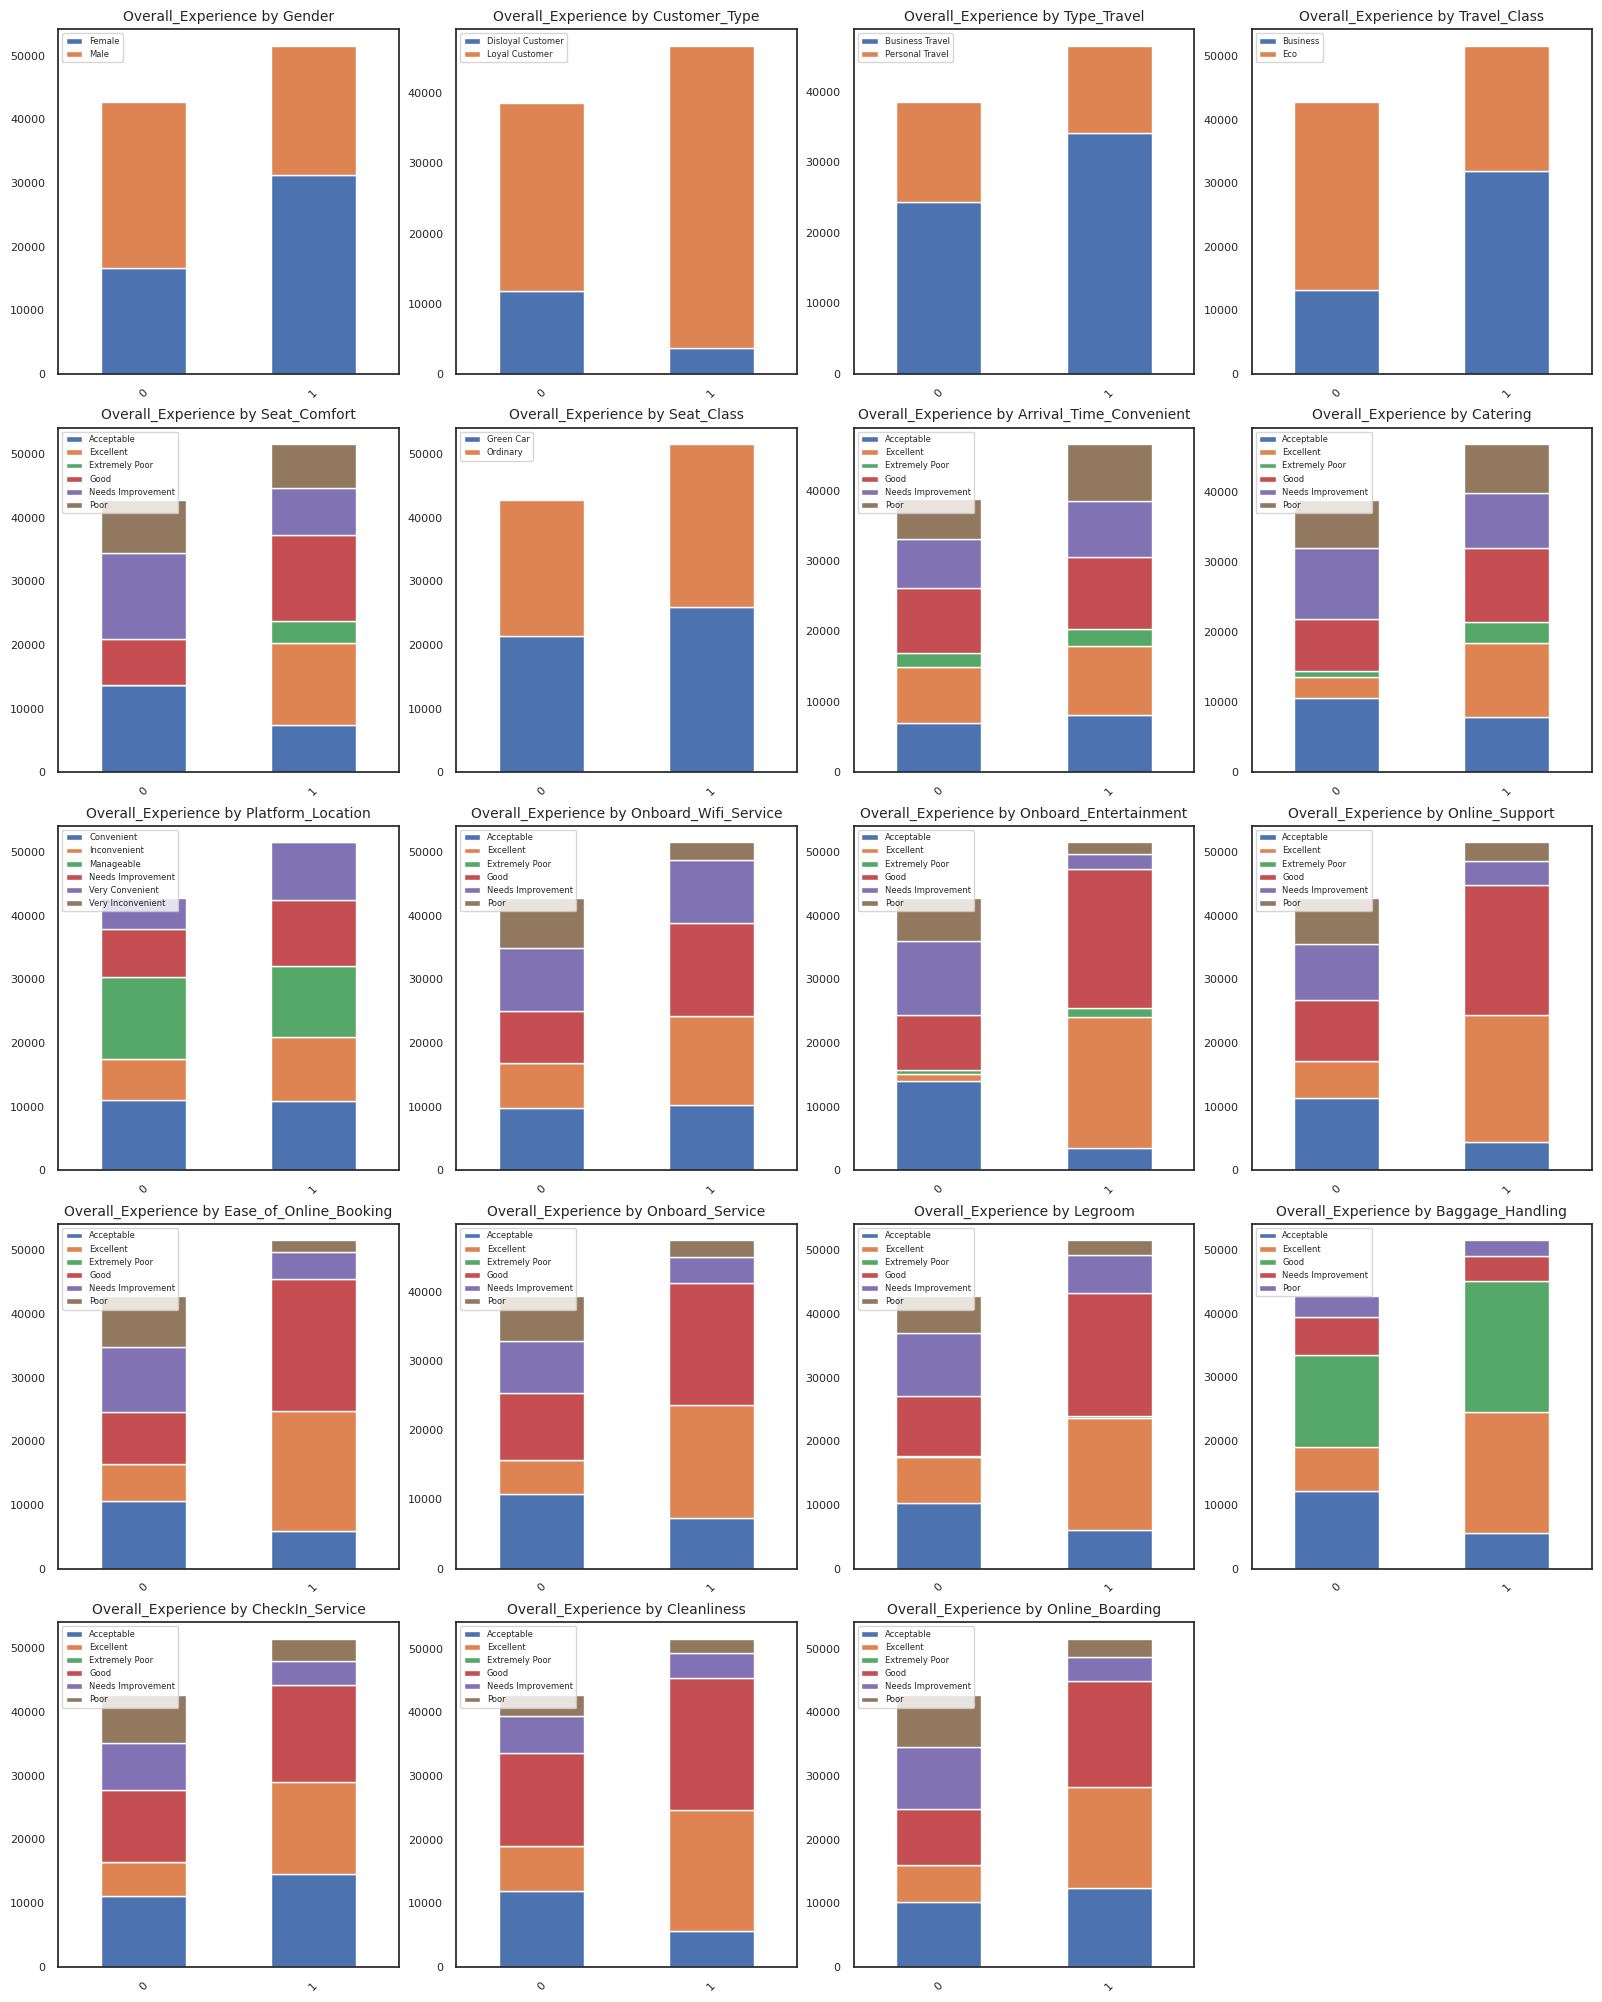

In [ ]:
# creating copy of categorical columns excpet Overall_Experience
cat_cols = df_train_cat.copy()
cat_cols.drop('Overall_Experience', axis = 1, inplace = True)

# plotting count plot for all categorical Variables
fig = plt.figure(figsize=(16,20))

for i, col in enumerate(cat_cols):
    ax = fig.add_subplot(5, 4, i + 1)
    pd.crosstab(df_train['Overall_Experience'], df_train[col]).plot(ax = ax, kind='bar', stacked=True)
    title = "Overall_Experience by " + col
    ax.set_title(title, fontsize = 10)
    ax.set_xlabel("")
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    ax.legend(prop={'size': 6})
plt.tight_layout()

**Observations:**
- `Gender`: More female have rated a 1 for overall experience than male and more male have rated their overall experience as 0 than female. This means that more female passengers are satisfied with their overall experience than male.
- `Customer_Type`: Most loyal customers have rated their overall experience 1 and very few disloyal customers have rated it a 1. Similarly, many loyal customers have rated their overall experience a 0 and also disloyal customers have rated it 0. This means that while most disloyal customers find their overall experience unsatisfactory, there are a considerable amount of loyal customers who feel they did not have a good overall experience either.
- `Type_Travel`: Passengers traveling for Business have more often rated their experience a 1 than those traveling for personal reasons. Similarly, passengers traveling for business have rated their experience 0 more often than passengers traveling for personal reasons. Hence, it looks like there is a general mix of ratings among the Type_Travel and there is no observable pattern here.
- `Travel_Class`: More Business class passengers have rated their overall experience as 1 than economy class passengers and more economy class passengers have rated their experience a 0 compared to business class passengers. This shows that the overall experience of Business class travel is satisfactory compared to Economy class travel for passengers.
- `Seat_Comfort`: Passengers who have rated seat comfort as excellent and extremely poor have all found the overall experience as 1, which is satisfactory. More passengers who have rated the seat comfort as good have rated their experience as 1 and fewer have rated as 0. More passengers who have rated seat comfort as acceptable, need improvement or poor have rated their overall experience as 0.
- `Seat_Class`: More passengers from both Green car as well as ordinary have found their overall experience a 1 (satisfactory), than 0
- `Arrival_Time_Convenient`: It looks like the passengers for each of the rating given to convenience of arrival time are equally split about their overall experience and no clear pattern can be observed.
- `Catering`: Passengers who have rated catering as excellent or good have mostly rated their overall experience a 1 (satisfactory). Passengers who have rated their catering experience as need improvement or acceptable, have mostly rated their overall experience a 0 (unsatisfactory)
- `Platform_Location`: Passengers ratings for Platform location has not much impact on their rating of overall experience as it looks like for each rating, the overall experience rating is split equally.
- `Onboard_Wifi_Service`: Passengers who have rated Onboard wifi service as excellent or good have mostly rated their overall experience as 1 (satisfactory), whereas passengers who have rated the onboard wifi service as poor have mostly rated their overall experience a 0.
- `Onboard_Entertainment`: Passengers who have rated the onboard entertainment as good or excellent have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as acceptable, need improvement or poor, have overwhelmingly rated their overall experience as 0
- `Online_Support`: Passengers who have rated the online support as good or excellent have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as acceptable, need improvement or poor, have overwhelmingly rated their overall experience as 0
- `Ease_of_Online_Booking`: Passengers who have rated the online booking ease as good or excellent have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as acceptable, need improvement or poor, have overwhelmingly rated their overall experience as 0
- `Onboard_Service`: Passengers who have rated the onboard service as good or excellent have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as acceptable, need improvement or poor, have overwhelmingly rated their overall experience as 0
- `Legroom`: Passengers who have rated the leg room as good or excellent have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as acceptable, need improvement or poor, have overwhelmingly rated their overall experience as 0
- `Baggage_Handling`: Passengers who have rated the baggage handling as good or excellent have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as acceptable have overwhelmingly rated their overall experience as 0
- `CheckIn_Service`: Passengers who have rated the checkin service as excellent, good or acceptable have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as  need improvement or poor, have rated their overall experience as 0
- `Cleanliness`: Passengers who have rated the cleanliness as good or excellent have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as acceptable or need improvement, have rated their overall experience as 0
- `Online_Boarding`: Passengers who have rated the online boarding as excellent, good or acceptable have overwhelmingly rated their overall experience as 1 (satisfactory), whereas those who have rated it as  need improvement or poor, have rated their overall experience as 0

### **Feature Engineering**



#### **Functions for feature engineering**



In [166]:
# function to encode the labels
def cat_encode(df, col):
    # for columns that have 6 unique ratings but is not Platform_Location
    # because Platform_Location has 6 unique rating but different from ones here
    if (df[col].nunique() == 6) & (col != 'Platform_Location'):
        df[col].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)

    # for the column Platform_Location
    elif col == 'Platform_Location':
        df['Platform_Location'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], [5, 4, 3, 2, 1, 0], inplace = True)

    # for columns that have 5 unique ratings
    elif df[col].nunique() == 5:
        df[col].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor'], [5, 4, 3, 2, 1], inplace = True)

    # for binary rated columns
    else:
        df['Gender'].replace(['Female', 'Male'], [1,0], inplace = True)
        df['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [1, 0], inplace = True)
        df['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [1, 0], inplace = True)
        df['Travel_Class'].replace(['Business', 'Eco'], [1, 0], inplace = True)
        df['Seat_Class'].replace(['Green Car', 'Ordinary'], [1, 0], inplace = True)

#### **Train Data**



In [167]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [168]:
# create a backup copy of fully imputed df_train
df_train_backup = df_train.copy()

In [169]:
# set target variable type back to int64
df_train['Overall_Experience'] = df_train['Overall_Experience'].astype('int64')
df_train['Overall_Experience'].dtype

dtype('int64')

In [173]:
# change all categorical variables form string to numerical
for col in df_train_cat:
    cat_encode(df_train, col)

# check the dataframe info to confirm the change
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  float64
 2   Customer_Type            85428 non-null  float64
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  float64
 5   Travel_Class             94379 non-null  int64  
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  float64
 11  Seat_Class               94379 non-null  int64  
 12  Arrival_Time_Convenient  85449 non-null  float64
 13  Catering                 85638 non-null  float64
 14  Platform_Location     

In [174]:
# check the head to confirm successful change
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


#### **Test Data**



In [175]:
# change all categorical variables form string to numerical
for col in df_test_cat:
    cat_encode(df_test, col)

# check the dataframe info to confirm the change
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  float64
 2   Customer_Type            32219 non-null  float64
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  float64
 5   Travel_Class             35602 non-null  int64  
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  float64
 10  Seat_Class               35602 non-null  int64  
 11  Arrival_Time_Convenient  32277 non-null  float64
 12  Catering                 32245 non-null  float64
 13  Platform_Location        35590 non-null  float64
 14  Onboard_Wifi_Service  

In [ ]:
# check the head to confirm successful change
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,1.0,NaN,36.0,1.0,1,532,0.0,0.0,3.0,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,99900002,1.0,0.0,21.0,1.0,1,1425,9.0,28.0,0.0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,99900003,0.0,1.0,60.0,1.0,1,2832,0.0,0.0,5.0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,99900004,1.0,1.0,29.0,0.0,0,1352,0.0,0.0,3.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,99900005,0.0,0.0,18.0,1.0,1,1610,17.0,0.0,5.0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


### **Determining best k for imputing missing values**



#### **Train Data**



In [176]:
# determine number of features that have missing values
df_train.isnull().sum()[df_train.isnull().sum() != 0]

Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Seat_Comfort                 61
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

First let us figure out what value of k works best fro this dataset. In order to do this, we will try imputing missing values for each value of k and use XGBoost to determine the train and test accuracy. The value that gives the best accuracy can be our choice.

In [ ]:
# checking head of df_train
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [ ]:
# saving a copy of df_train for future reference
df_train_copy = df_train.copy()

# splitting X, y
X = df_train.drop(['ID','Overall_Experience'], axis = 1)
y = df_train[['ID', 'Overall_Experience']]

In [ ]:
X.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,1.0,1.0,52.0,NaN,1,272,0.0,5.0,2.0,1,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,0.0,1.0,48.0,0.0,0,2200,9.0,0.0,1.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,1.0,1.0,43.0,1.0,1,1061,77.0,119.0,2.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,1.0,1.0,44.0,1.0,1,780,13.0,18.0,3.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,1.0,1.0,50.0,1.0,1,1981,0.0,0.0,3.0,0,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [ ]:
y.head()

,ID,Overall_Experience
0,98800001,0
1,98800002,0
2,98800003,1
3,98800004,0
4,98800005,1


In [ ]:
# libraries to check best impute values
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
# dataframe to store accuracy values
impute_scores = pd.DataFrame(columns = ['k', 'train_accuracy', 'test_accuracy'])

for i in range(1,22):
    X_impute = X.copy()
    y_impute = y['Overall_Experience']

    # Define the pipeline steps
    pipeline = Pipeline([
    ("impute", KNNImputer(n_neighbors=i)), # Impute missing values using 5 nearest neighbors
    ("scale", MinMaxScaler()), # Scale the features to range [0, 1]
    ("xgb", XGBClassifier()) # Use XGBoost classifier as the final estimator
    ])

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_impute, y_impute, test_size=0.3, random_state=13)

    print("Split dimensions:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    y_test_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    impute_scores.loc[len(impute_scores)] = [i, train_accuracy, test_accuracy]
    print ("k=", i, ", train_accuracy =", train_accuracy, ", test_accuracy =", test_accuracy)

impute_scores

Split dimensions: (66065, 23) (28314, 23) (66065,) (28314,)
k= 1 , train_accuracy = 0.9698630136986301 , test_accuracy = 0.9520731793459066
Split dimensions: (66065, 23) (28314, 23) (66065,) (28314,)
k= 2 , train_accuracy = 0.9717399530765155 , test_accuracy = 0.9533093169456806
Split dimensions: (66065, 23) (28314, 23) (66065,) (28314,)
k= 3 , train_accuracy = 0.9712101718004995 , test_accuracy = 0.9528501801229073
Split dimensions: (66065, 23) (28314, 23) (66065,) (28314,)
k= 4 , train_accuracy = 0.9738439415726936 , test_accuracy = 0.9537331355513173
Split dimensions: (66065, 23) (28314, 23) (66065,) (28314,)
k= 5 , train_accuracy = 0.9727995156285476 , test_accuracy = 0.9534152715970898
Split dimensions: (66065, 23) (28314, 23) (66065,) (28314,)
k= 6 , train_accuracy = 0.9737985317490351 , test_accuracy = 0.9530267712085894
Split dimensions: (66065, 23) (28314, 23) (66065,) (28314,)
k= 7 , train_accuracy = 0.9731325210020434 , test_accuracy = 0.9547220456311365
Split dimensions: (6

,k,train_accuracy,test_accuracy
0,1.0,0.969863,0.952073
1,2.0,0.971740,0.953309
2,3.0,0.971210,0.952850
3,4.0,0.973844,0.953733
4,5.0,0.972800,0.953415
5,6.0,0.973799,0.953027
6,7.0,0.973133,0.954722
7,8.0,0.972497,0.954122
8,9.0,0.972512,0.954263
9,10.0,0.972224,0.954475


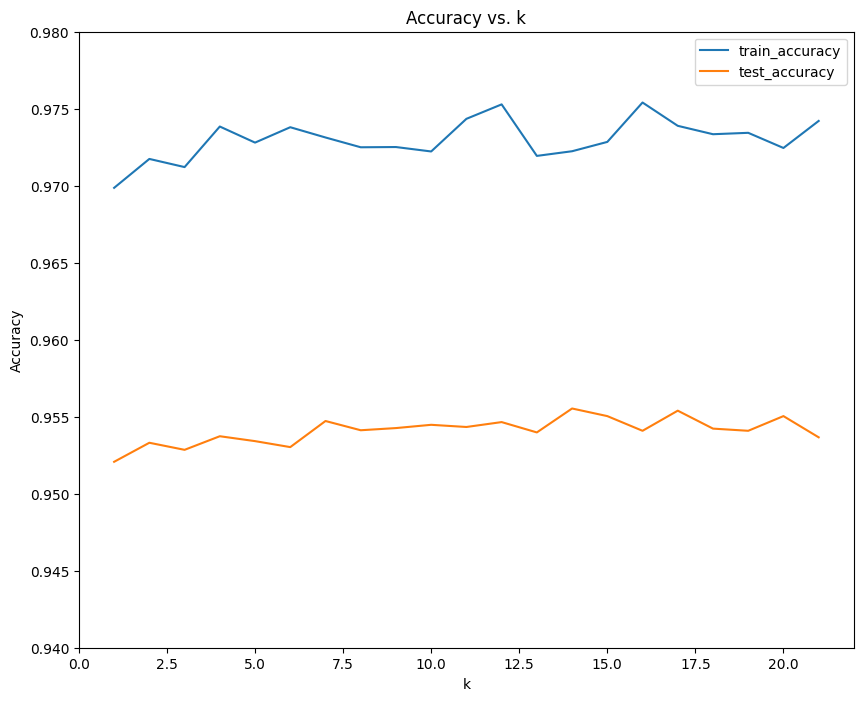

In [ ]:
# plot train_accuracy and test_accuracy with k in x axis on the same plot

plt.figure(figsize = (10,8))
plt.plot(impute_scores['k'], impute_scores['train_accuracy'])
plt.plot(impute_scores['k'], impute_scores['test_accuracy'])
plt.ylim(0.94,0.98)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.show()


We can observe that k=14 gives us the best test result. We will use k=14 to impute the missing values.

We will do the further processing in the model building notebook. So let us save the dataframe to be read in the notebook.

### **Saving train and test dataframes**



In [ ]:
# save df_train to a csv without index but including column names
df_train.to_csv('/content/drive/MyDrive/DScourse/Hackathon/KNN3/train_data.csv', index = False, header = True, columns = df_train.columns)

In [ ]:
# save df_test to a csv without index but including column names
df_test.to_csv('/content/drive/MyDrive/DScourse/Hackathon/KNN3/pred_data.csv', index = False, header = True, columns = df_test.columns)